                            OLS Regression Results                            
Dep. Variable:         GDPGrowthValue   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.361
Date:                Sat, 17 Dec 2022   Prob (F-statistic):             0.0214
Time:                        18:49:42   Log-Likelihood:                -391.29
No. Observations:                 245   AIC:                             786.6
Df Residuals:                     243   BIC:                             793.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.48

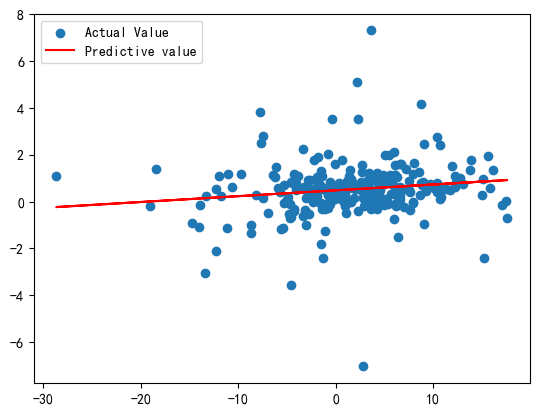

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# CHE's data
datas = pd.read_excel(r'E:\Code\Python\Homework\Digital-Tools-for-Finance\CHE.xlsx')

# independent variable
x = datas.iloc[:, 11]
x = sm.add_constant(x)
# dependent variable
y = datas.iloc[:, 6]
model = sm.OLS(y, x).fit()
print(model.summary())

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict()
x = datas.iloc[:, 11]
plt.scatter(x, y, label='Actual Value')
plt.plot(x, predicts, color = 'red', label='Predictive value')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         GDPGrowthValue   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.982
Date:                Sat, 17 Dec 2022   Prob (F-statistic):              0.162
Time:                        18:11:52   Log-Likelihood:                -209.06
No. Observations:                 105   AIC:                             422.1
Df Residuals:                     103   BIC:                             427.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

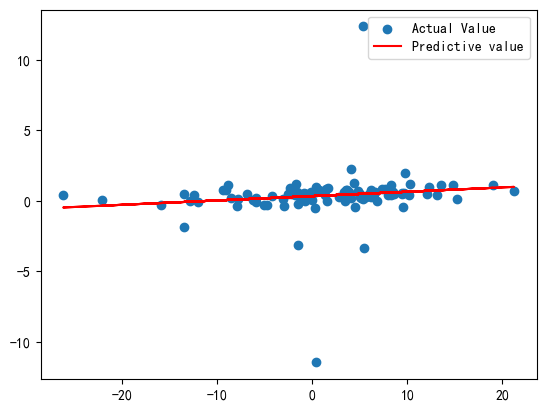

In [33]:
data_all = pd.read_excel(r'E:\Code\Python\Homework\Digital-Tools-for-Finance\EuroArea19.xlsx')

# independent variable
x = data_all.iloc[:, 11]
x = sm.add_constant(x)
# dependent variable
y = data_all.iloc[:, 6]
model = sm.OLS(y, x).fit()
print(model.summary())

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict()
x = data_all.iloc[:, 11]
plt.scatter(x, y, label='Actual Value')
plt.plot(x, predicts, color = 'red', label='Predictive value')
plt.legend()
plt.show()

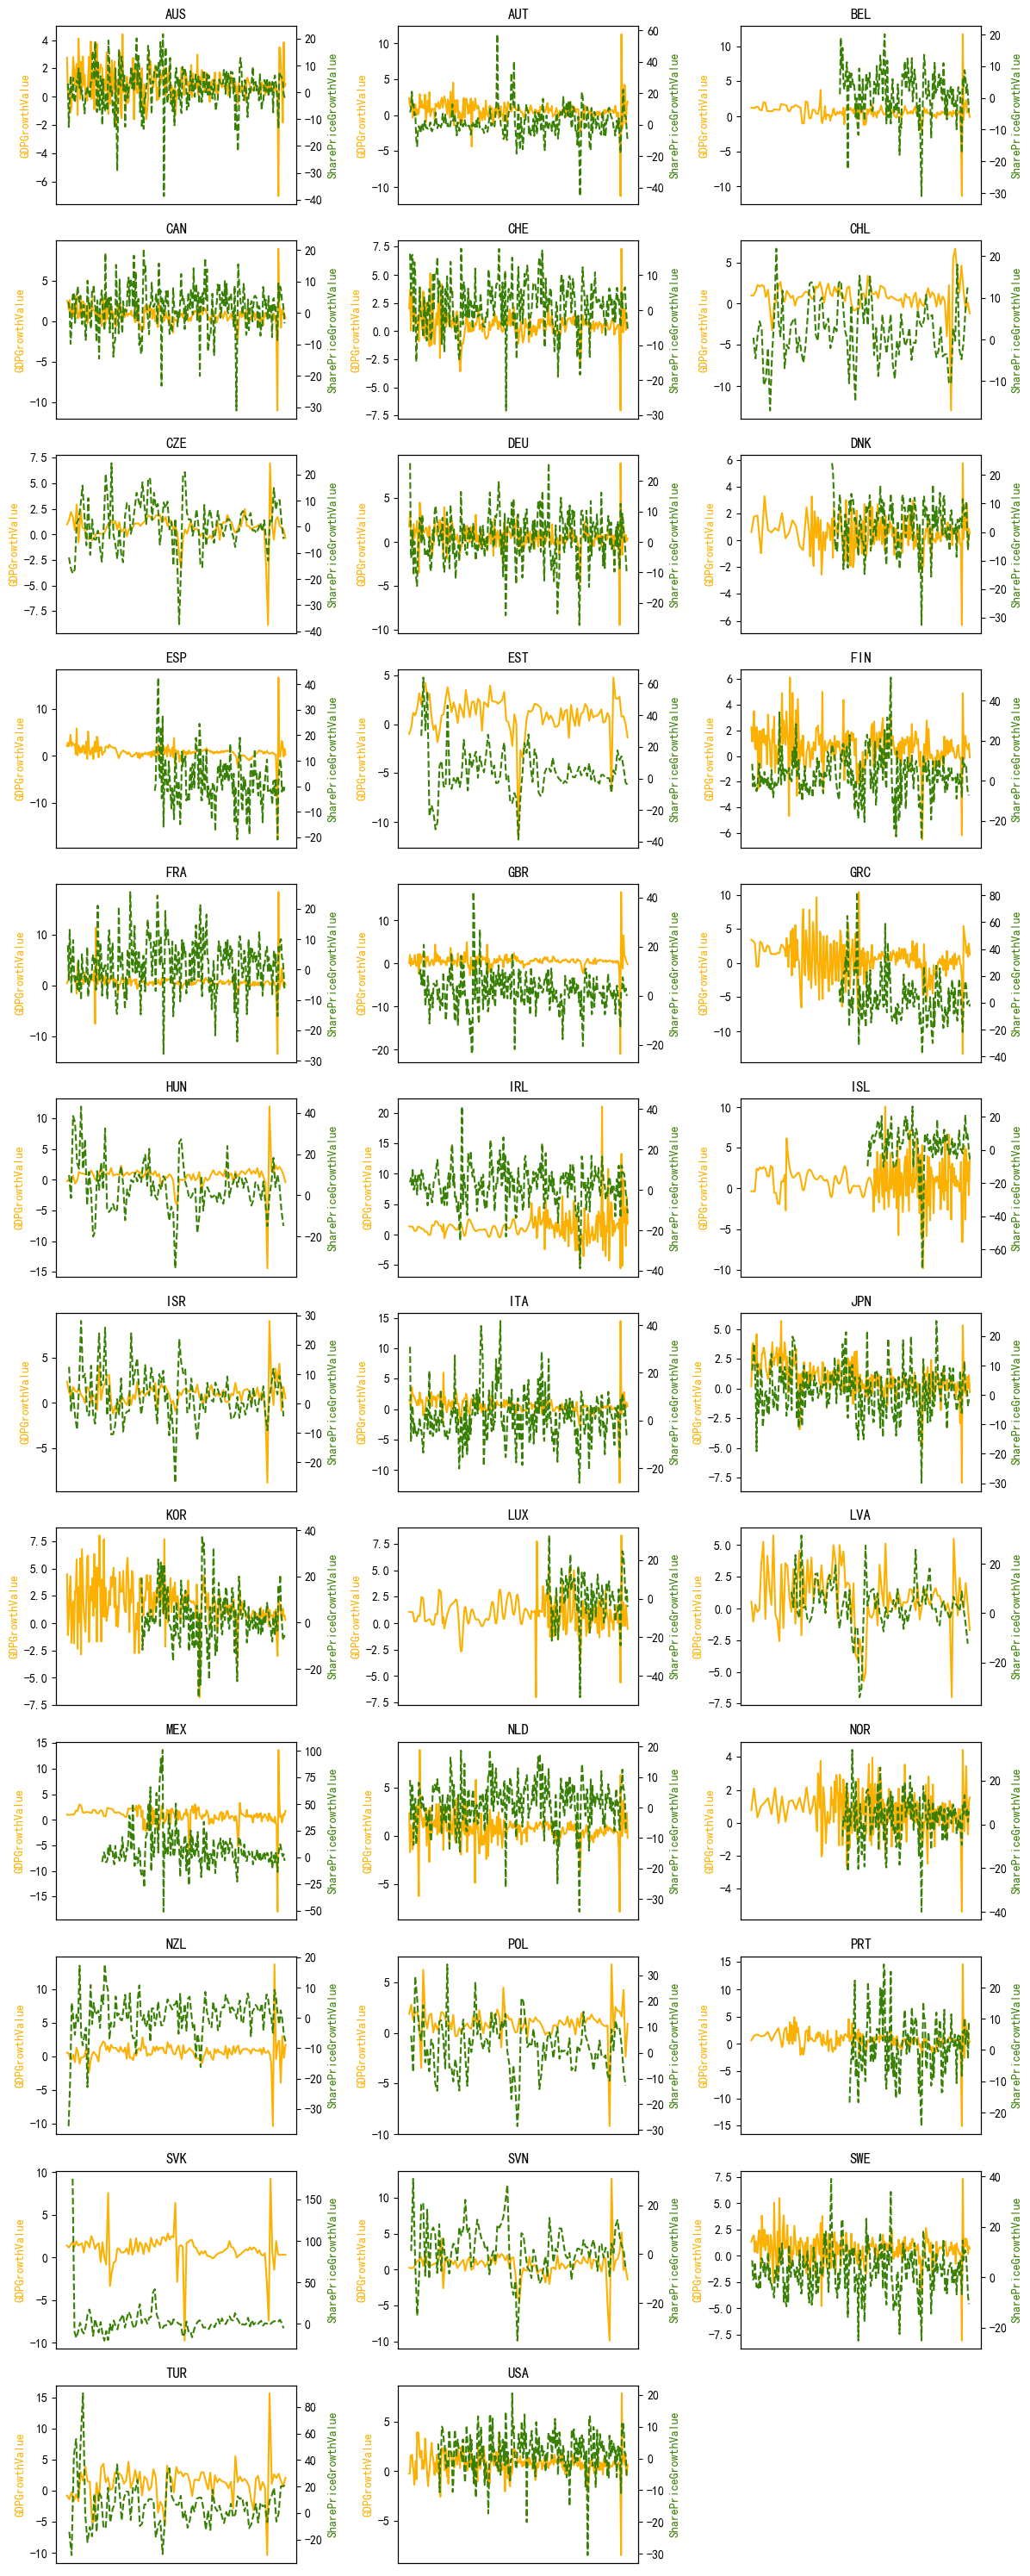

In [34]:
data2 = pd.read_excel(r'E:\Code\Python\Homework\Digital-Tools-for-Finance\Final_project_data.xlsx')

#print(len(data2['LOCATION'].drop_duplicates()))
i=1
plt.figure(figsize=(12,30))
for country in data2['LOCATION'].drop_duplicates():
    d=data2.loc[data2['LOCATION']==country]
    ax1=plt.subplot(12,3,i)
    i=i+1
    y = d.iloc[:, 6]
    y2=d.iloc[:, 11]
    x = d.iloc[:, 5]
    ax2=ax1.twinx()
    ax1.plot(x, y,c='xkcd:yellow orange', label="GDPGrowthValue")
    ax2.plot(x,y2,c='xkcd:dark grass green',linestyle='--' ,label="SharePriceGrowthValue")
    plt.title(country)
    ax1.set_ylabel('GDPGrowthValue',color = 'xkcd:yellow orange')
    ax2.set_ylabel('SharePriceGrowthValue',color = 'xkcd:dark grass green')
    plt.xticks([])
plt.tight_layout()
plt.show()

In [35]:
data2 = pd.read_excel(r'E:\Code\Python\Homework\Digital-Tools-for-Finance\Final_project_data.xlsx')

GDP = data2.groupby("LOCATION").agg({"GDPGrowthValue" : ['max','min','mean','std']})
Stock = data2.groupby("LOCATION").agg({"SharePriceGrowthValue" : ['max','min','mean','std']})

total_data=GDP.join(Stock)
print(total_data.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{GDPGrowthValue} & \multicolumn{4}{l}{SharePriceGrowthValue} \\
{} &            max &        min &      mean &       std &                   max &        min &      mean &        std \\
LOCATION &                &            &           &           &                       &            &           &            \\
\midrule
AUS      &       4.418806 &  -7.020018 &  0.837857 &  1.181453 &             21.642014 & -38.676460 &  1.704898 &   7.538439 \\
AUT      &      11.232721 & -11.243786 &  0.673663 &  1.447553 &             57.487021 & -45.421095 &  1.539374 &   9.111118 \\
BEL      &      11.731267 & -11.397832 &  0.645568 &  1.271786 &             20.089567 & -30.939630 &  1.654958 &   7.582937 \\
CAN      &       8.983958 & -11.042537 &  0.759495 &  1.262450 &             20.383706 & -31.094573 &  1.672189 &   6.875763 \\
CHE      &       7.315925 &  -7.047209 &  0.551725 &  1.234857 &             17.589432 & -28.668096 &  1.5

C:\Users\94569\AppData\Local\Temp\ipykernel_9240\2835706943.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(total_data.to_latex())
